# 3. 데이터 전처리 이해와 실무

### 3.4 데이터 변환 : 특징 생성

### 특징 생성 (강의 교안)
    1. 범주 인코딩 기반 생성
    2. 결합 및 분해 기반 생성
    3. 차원 축소 기반 생성(알고리즘 적용)
    
### 실습 내용 요약
   - 예제 데이터 활용 범주형 변수 인코딩, 결합 및 분해 기반 신규 특징 생성ㅇ르 비롯한 주성분 구성, 군집분석 기반 특징 생성까지 실습
   
### 실습 데이터
   - 범주 인코딩 실습 및 분해결합 기반 특징 생성 실습을 위한 생성 데이터 : 구매 시점 이력 정보 데이터
   
   - 차원축소 기반 특징 생성 실습 데이터:
     - 데이터 : Breast Cancer Wisconsin (Diagnotic)
     - 데이터 제공처 : https://archive-beta.ics.uci.edu/ml/datasets/breast-cancer-wisconsin+diagnostic
     - 데이터 설명 : https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names
     - 데이터 Download link : https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

### 실습 시 활용 패키지
   - pandas
   - numpy
   - scikit-learn
   - matplotlib
   - seaborn

### 범주 인코딩
   - 숫자로 표현되지 않은 데이터를 수치형으로 표현하고 모델링에 적용하기 위한 과정

In [3]:
import numpy as np
import pandas as pd

In [13]:
# 실습 데이터 loading : 교육 실습을 위한 생성 데이터
# 데이터 로딩 및 개요 확인
# 데이터를 제공 받는경우
#data = pd.read_csv("./data/encoding_sample_data.csv", encoding = 'cp949')
#data.head()

#주어진 데이터가 없으므로 생성

# 날짜 생성
np.random.seed(1)
year = np.random.randint(2020,2022,400)

np.random.seed(2)
month = np.random.randint(1,13,400)

np.random.seed(3)
day = np.random.randint(1,28,400)

np.random.seed(4)
h = np.random.randint(0,24,400)
np.random.seed(5)
m = np.random.randint(0,60,400)

# purchase_YN 값 생성
np.random.seed(5)
yn = np.random.randint(0,2,400)

# 성별
np.random.seed(6)
g = np.random.randint(0,2,400)
sex = ['M', 'F']

#도시
np.random.seed(7)
c = np.random.randint(0,5,400)
ci = ['광주', '대구', '대전', '부산', '서울']

#데이타 생성
data = {
    'date_time' : [],
    'purchase_YN' : [],
    'gender' : [],
    'city' :[],
}
for i in range(400):
    data['date_time'].append(str(year[i])+'-'+str(month[i])+'-'+str(day[i])+' '+str(h[i])+':'+str(m[i]))
    data['purchase_YN'].append(yn[i])
    data['gender'].append(sex[g[i]])
    data['city'].append(ci[c[i]])

df = pd.DataFrame(data)
                          
df.head()



,date_time,purchase_YN,gender,city
0,2021-9-11 14:35,1,M,서울
1,2021-9-25 23:14,0,F,대구
2,2020-7-26 5:47,1,F,부산
3,2020-12-4 1:38,1,M,부산
4,2021-3-25 8:54,0,M,서울


In [14]:
df['city'].value_counts()

서울    91
광주    81
부산    80
대전    75
대구    73
Name: city, dtype: int64

### one_hot_incoding

In [16]:
# city라는 범주형 변수 one_hot Encoding
# Pandas의 get_dummies 함수 활용하여 쉽게 구현 가능

encoding_data = df.copy()
encoding_data = pd.get_dummies(encoding_data, columns = ['city'])
encoding_data.head()

# 기존 city 변수 내 5개의 범주가 존재
# get_dummies 함수를 통해 원본 데이터의 city 변수 대신 각 범주별 변수가 생성 (1개 변수 -> 5개 변수)

,date_time,purchase_YN,gender,city_광주,city_대구,city_대전,city_부산,city_서울
0,2021-9-11 14:35,1,M,0,0,0,0,1
1,2021-9-25 23:14,0,F,0,1,0,0,0
2,2020-7-26 5:47,1,F,0,0,0,1,0
3,2020-12-4 1:38,1,M,0,0,0,1,0
4,2021-3-25 8:54,0,M,0,0,0,0,1


- one-hot Encoding은 각 범주 요소마다 별도 컬럼으로 생성하여 True/False를 표현
- 기계학습이 많은 알고리즘은 수치형 데이터를 입력값으로 받아야함
- 따라서, 범주형 변수의 one_hot Encoding 기법을 활용하여 기계학습 적용의 재약점을 해소 가능


### 결합 및 분해 기반 특징 생성
- 기존 원본데이터에 나타나지 않는 새로운 변수를 생성하고자 하며
- 다양한 파생변수를 생성하여 데이터 특성을 파악하거나 모델링에 사용하기 위함
- 특징생성시 도메인지식 또는 일반적 관념기준 사용


In [18]:
# 시간대 별 파악 목적
# 어느 시간대 혹은 요일별로 구매 결정이 높아지는지 확인 하고자 할때

creation_data = df.copy()
creation_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date_time    400 non-null    object
 1   purchase_YN  400 non-null    int32 
 2   gender       400 non-null    object
 3   city         400 non-null    object
dtypes: int32(1), object(3)
memory usage: 11.1+ KB


In [21]:
# 기존 범주형 변수인 date_time 컬럼을 datetime 형식으로 변환
creation_data['date_time'] = pd.to_datetime(creation_data['date_time'])
creation_data.head()

,date_time,purchase_YN,gender,city
0,2021-09-11 14:35:00,1,M,서울
1,2021-09-25 23:14:00,0,F,대구
2,2020-07-26 05:47:00,1,F,부산
3,2020-12-04 01:38:00,1,M,부산
4,2021-03-25 08:54:00,0,M,서울


In [22]:
#데이터 타입 확인
creation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    400 non-null    datetime64[ns]
 1   purchase_YN  400 non-null    int32         
 2   gender       400 non-null    object        
 3   city         400 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 11.1+ KB


In [24]:
# date 컬럼을 연/월/일/요일 등의 의미를 지닌 변수로 분해
creation_data['year'] = creation_data['date_time'].dt.year #연도
creation_data['month'] = creation_data['date_time'].dt.month #월
creation_data['day'] = creation_data['date_time'].dt.day #일
creation_data['hour'] = creation_data['date_time'].dt.hour #시간
creation_data['dayofweek'] = creation_data['date_time'].dt.dayofweek # 요일 (월 = 0)
creation_data.head()

,date_time,purchase_YN,gender,city,year,month,day,hour,dayofweek
0,2021-09-11 14:35:00,1,M,서울,2021,9,11,14,5
1,2021-09-25 23:14:00,0,F,대구,2021,9,25,23,5
2,2020-07-26 05:47:00,1,F,부산,2020,7,26,5,6
3,2020-12-04 01:38:00,1,M,부산,2020,12,4,1,4
4,2021-03-25 08:54:00,0,M,서울,2021,3,25,8,3


In [27]:
# 오전/오후의 의미를 지닌 변수 생성을 위한 결합 방안 (아래 예제는 변수 내 Gruio으로 결합)
# AM PM 구분 변수 생성
creation_data['ampm'] = 'AM'
creation_data.loc[creation_data['hour'] >= 12 , 'ampm'] = 'PM'
creation_data

,date_time,purchase_YN,gender,city,year,month,day,hour,dayofweek,ampm
0,2021-09-11 14:35:00,1,M,서울,2021,9,11,14,5,PM
1,2021-09-25 23:14:00,0,F,대구,2021,9,25,23,5,PM
2,2020-07-26 05:47:00,1,F,부산,2020,7,26,5,6,AM
3,2020-12-04 01:38:00,1,M,부산,2020,12,4,1,4,AM
4,2021-03-25 08:54:00,0,M,서울,2021,3,25,8,3,AM
...,...,...,...,...,...,...,...,...,...,...
395,2020-01-05 16:18:00,0,F,광주,2020,1,5,16,6,PM
396,2020-10-22 00:58:00,0,M,부산,2020,10,22,0,3,AM
397,2020-03-09 01:20:00,0,F,서울,2020,3,9,1,0,AM
398,2021-03-20 13:46:00,1,F,서울,2021,3,20,13,5,PM


- 연/월/일 등을 분석가 기준에 맞추어 시간대의 의미를지닌 신규 파생 변수로 분해 및 결합 가능
- dayofweek 변수의 경우 평일/주말로 구분하는 신규 파생 변수로 분해 및 결합 가능

### 차원 축소 기반 특징 생성 (1) : PCA(주성분 분석)
 - 여러 개의 변수를 지닌 고차원 데이터를  저차원으로 변환하도록 주성분들을 생성하는 알고리즘
 - 원 변수들이 지는 정보를 최대한 확보하는 저차원 데이터로 생성하는 방법

In [4]:
# Breast Cancer 데이터 활용기반 실습
#데이터 로딘
cancer = pd.read_csv("./data/wdbc.data.csv", header=None)
#데이터 컬럼명 지정
cancer.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean'
                 , 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se'
                 , 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se','symmetry_se','fractal_dimension_se', 'radius_worst'
                 , 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst'
                 , 'symmetry_worst', 'fractal_dimension_worst']
# ID를 index화
cancer= cancer.set_index('id')
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [5]:
# input 및 target 구분
input_df = cancer.drop(['diagnosis'], axis=1) # 열을 추출해야 하므로 axis=1로 지정
print(np.shape(input_df))

target_df = cancer[['diagnosis']]
print(np.shape(target_df))

(569, 30)
(569, 1)


In [6]:
# 30개의 독립변수(input 변수)로 이루어진 데이터의 주성분 분석
# 주성분 분석 수행 이전, 각 변수의 스케일이 서로 다르기 때문에 표준화 수행
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

# input 값을 scaling 실행 수 변환
# 학습
std_scaler.fit(input_df)
# 변환
input_scaled = std_scaler.transform(input_df)

# array 형태로 변환됨
input_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [7]:
# 주성분 분석 수행
from sklearn.decomposition import PCA

# 두 개 주성분만 유지시키도록 수행
# 30개 변수의 데이터를 2개의 주성분으로 남도록 변환

pca= PCA(n_components=2)
pca.fit(input_scaled)
X_pca = pca.transform(input_scaled)
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [8]:
# PCA 수행된 input 데이터 확인
# 2개의 주성분 확인
X_pca_df = pd.DataFrame(X_pca, columns = ['pc1', 'pc2'])
X_pca_df

,pc1,pc2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


#### - 30개 변수를 지닌 데이터가 2개의 특징들로 압축되었음

In [9]:
# 2개의 주성분으로 구성된 컬럼들이 Target을 구분하기에 효율적인지 시각화로 확인
import matplotlib.pyplot as plt
import seaborn as sns

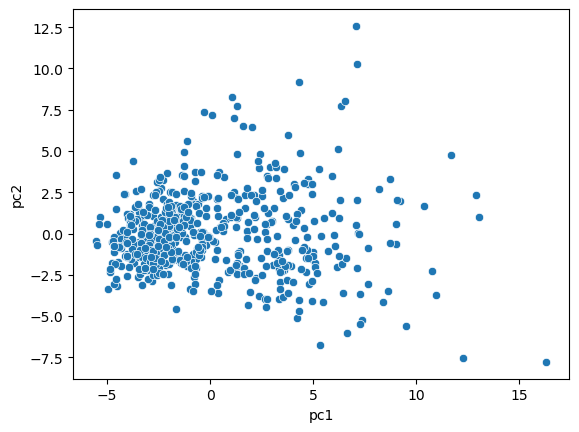

In [10]:
# 산점도로 2개의 주성분을 시각화
ax = sns.scatterplot(x='pc1', y='pc2', data=X_pca_df)

In [24]:
# Target과 확인을 위해 주성분 분석을 수행한 input 데이터와 기존 Target 데이터를 Mearge
# pca_df 생성 : 2개의 주성분(input) 및 1개의 Target (diagnosis)
target_df = target_df.reset_index()
pca_df = pd.merge(X_pca_df, target_df, left_index = True, right_index=True, how='inner')
pca_df = pca_df[['pc1', 'pc2','diagnosis']]
pca_df

,pc1,pc2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


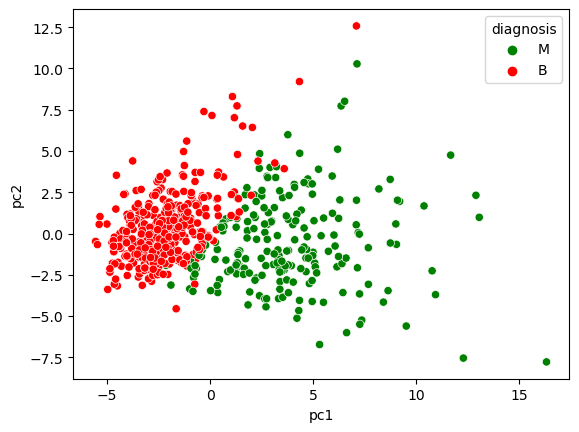

In [25]:
# 클래서를 색깔로 구분하여 처음 두개의 주성분 Target과 비교
ax = sns.scatterplot(x='pc1', y='pc2', hue = 'diagnosis', data = pca_df, palette = ['green', 'red'])

- 실제 모델링에 적용하기 위해 효율적으로 활용 가능한 주성분 분석
- 특히, record 및 컬림이 많은 경우 모델링 연산비용이 많이 들게 되므로 효율적인 차원 축소 기반의 특징을 생산하는 것이 분석 과정 내 필요한 과정


- 주성분을 석택하는 다른방안
- 유지시킬 주선분 개수가 아닌 분산의 설명가능 수준을 비율로 선택가능
   - pca = PCA(n_components = 0.8):
   - 주성분의 수는 전체 분산의 최소 80% 수준에서 설명하는 수준이며 자동으로 선택
- 이를 통해 수치를 변경하면서 추출되는 주성분의 수 확인 가능하며, 이는 분산에 기초한 주성분의 개수를 선택하는 부분에서 얼마나 많은 주성분을 사용할 것인지 확인해야 할때 사용 가능

In [26]:
# 전체 분산의 최소 80% 수준에서 설명하는 수준의 주성분 확보
pca = PCA(n_components = 0.8)
pca.fit(input_scaled)
X_pca = pca.transform(input_scaled)
X_pca_df = pd.DataFrame(X_pca)
X_pca_df

,0,1,2,3,4
0,9.192837,1.948583,-1.123166,3.633731,-1.195110
1,2.387802,-3.768172,-0.529293,1.118264,0.621775
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086
3,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,3.935302,-1.948072,1.389767,2.940639,0.546747
...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723
566,1.256179,-1.902297,0.562731,-2.089227,1.809991
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742


### 차원 축소 기반 특징 생성 (2) : clustering (군집 분석)
   - 여러 개의 변수를 하나의 변수(군집결과)로 변환 차원 축소

In [27]:
from sklearn.cluster import KMeans

In [30]:
# 일부 변수만 선택 (30개의 변수 중 15개의 변수만 임의로 선정)
# 즉, 활용할 정보의 양을 절반으로 축소
subset_df = input_df.iloc[:,0:15]
subset_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se
id,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903


In [33]:
# 데이터 스케일링
std_scaler.fit(subset_df)
subset_input_scaled = std_scaler.transform(subset_df)
subset_input_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.83303087,
         2.48757756, -0.21400165],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  0.26332697,
         0.74240195, -0.60535085],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  0.8509283 ,
         1.18133606, -0.29700501],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.27669279,
         0.1806983 , -0.37934168],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.43852964,
         1.0095027 , -0.17299998],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.15744905,
        -0.46615196,  0.04934236]])

In [35]:
# K-means 클러스터링 활용
# 군집 label 수 설정
k = 5
model = KMeans(n_clusters = k, random_state=10)

In [36]:
# scaling 한 데이터를 fit하여 모델 학습
model.fit(subset_input_scaled)

# 클러스터링 결과를 타겟 변수와 비교하기 위하여 원 데이터에 컬럼으로 생성
target_df['cluster'] = model.fit_predict(subset_input_scaled)

In [38]:
# 최종데이터 확인
target_df

,index,id,diagnosis,cluster
0,0,842302,M,0
1,1,842517,M,2
2,2,84300903,M,2
3,3,84348301,M,4
4,4,84358402,M,2
...,...,...,...,...
564,564,926424,M,0
565,565,926682,M,2
566,566,926954,M,2
567,567,927241,M,0


In [39]:
#15개의 임의의 변수로 만들어진 하나의 특징(군집결과)과 기존 Target 변수 비교
pd.crosstab(target_df.diagnosis, target_df.cluster)

cluster,0,1,2,3,4
diagnosis,,,,,
B,0,111,0,229,17
M,36,5,93,26,52


   - 임의의 15개 변수만을 활용한 하나의 특징(군집 결과)이 Target 구분에 효과적일 것임을 예측 가능함
   - 이처럼 많은 변수를 하나의 특징으로 구성하고, 입력 데이터의 차원을 줄인다면 모델 연산 비용 절감에 효과적